In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def gradient_descent_visualization():
    def y_function(x):
        return x ** 2

    def y_derivative(x):
        return 2 * x

    X = np.arange(-100, 100, 1)
    y = y_function(X)

    current_pos = (80, y_function(80))

    learning_rate = 0.01

    prev_pos = float('inf')
    for i in range(1000):
        new_x = current_pos[0] - learning_rate * y_derivative(current_pos[0])
        new_y = y_function(new_x)
        current_pos = (new_x, new_y)
        if abs(current_pos[0] - prev_pos) < 1e-3:
            print(f"Converged at iteration {i}")
            break
        prev_pos = current_pos[0]
        plt.plot(X,y)
        plt.scatter(current_pos[0], current_pos[1], c='red')
        plt.pause(0.001)
        plt.clf()

In [3]:
class PolynomialRegression():
    def __init__(self, degree=None, learning_rate=0.001, epochs=50000) -> None:
        if degree <= 0:
            raise ValueError("Degree must be a positive number greater")
        self.degree = degree if degree else 1
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.theta = None
        self.costs = []
    
    def _extend_polynomial(self, X):
        return np.hstack([X**i for i in range(1, self.degree + 1)])
    
    def _normalize(self, X):
        return (X - self.mean) / self.std

    def fit(self, X, y, subplots=False):
        self.X = X
        X = self._extend_polynomial(X)
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        X = self._normalize(X)

        X = np.hstack((np.ones((X.shape[0], 1)), X))
        
        self.theta = np.zeros((X.shape[1], 1))
        m, n = X.shape
        prev_cost = float('inf')
        self.costs = []

        for epoch in range(self.epochs):
            y_pred = np.dot(X, self.theta)
            error = y_pred - y
            cost = (1/(2*m) * np.sum(np.square(error)))
            d_theta = (1/m) * np.dot(X.T, error)
            self.theta = self.theta - self.learning_rate * d_theta
            self.costs.append(cost)
            if abs(prev_cost - cost) < 0.0001:
                print(f'Converged at epoch {epoch}')
                break
            prev_cost = cost
            if subplots:
                plt.scatter(self.X, y, c="red")
                plt.plot(self.X, y_pred)
                plt.pause(0.0001)
                plt.clf()
        plt.scatter(self.X, y, c="red")
        plt.plot(self.X, y_pred)
        plt.show()

    def plot_error_history(self):
        plt.plot(np.arange(1,len(self.costs) + 1), self.costs)
        plt.xlabel('Number of epochs')
        plt.ylabel('Mean Squared Error')
        plt.title('MSE vs Epochs')
        plt.show()
    
    def predict(self, X):
        X = self._extend_polynomial(X)
        X = self._normalize(X)
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        y_pred = np.dot(X, self.theta)
        return y_pred

In [4]:
class LinearRegression():
    def __init__(self, learning_rate=0.001, epochs=50000, normalization='min_max') -> None:
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.theta = None
        self.costs = []
        self.normalization = normalization
    
    def _normalize(self, X):
        if self.normalization == 'min_max':
            return (X - self.min) / (self.max - self.min)
        else:
            return (X - self.mean) / self.std
    
    def fit(self, X, y, subplots=False):
        self.X = X
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        self.min = np.min(X, axis=0)
        self.max = np.max(X, axis=0)
        X = self._normalize(X)
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        self.theta = np.zeros((X.shape[1], 1))
        m, n = X.shape
        prev_cost = float('inf')
        self.costs = []

        for epoch in range(self.epochs):
            y_pred = np.dot(X, self.theta)
            error = y_pred - y
            cost = (1/(2*m) * np.sum(np.square(error)))
            d_theta = (1/m) * np.dot(X.T, error)
            self.theta = self.theta - self.learning_rate * d_theta
            self.costs.append(cost)
            if abs(prev_cost - cost) < 0.001:
                print(f'Converged at epoch {epoch}')
                break
            prev_cost = cost
            if subplots and self.X.shape[1] == 1:
                plt.scatter(self.X, y, c="red")
                plt.plot(self.X, y_pred)
                plt.pause(0.0001)
                plt.clf()
    
        if self.X.shape[1] == 1:
            plt.scatter(self.X, y, c="red")
            plt.plot(self.X, y_pred)
            plt.show()
        
    def plot_error_history(self):
        #plt.xlim(0, self.epochs)
        plt.plot(np.arange(1,len(self.costs) + 1), self.costs)
        plt.xlabel('Number of epochs')
        plt.ylabel('Mean Squared Error')
        plt.title('MSE vs Epochs (30% - 70%) ')
        plt.show()

    def predict(self, X):
        X = self._normalize(X)
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        y_pred = np.dot(X, self.theta)
        return y_pred

In [5]:
def preprocess_dataframe(df):
    def onehotencode(df, column):
        onehot = pd.get_dummies(df[column], dtype=int)
        df.drop([column], axis=1, inplace=True)
        df = pd.concat([df, onehot], axis=1)
        return df.iloc[:,:-1]
    y = (df.iloc[:,-1].values).reshape(-1,1)
    df.drop(['Profit'], axis = 1, inplace=True)
    df = onehotencode(df, 'State')
    X = df.iloc[:,:].values
    return X, y

In [6]:
def my_train_test_split(X,y, train_size=0.7):
    sep = int(len(X) * train_size)
    X_train, X_test = X[:sep], X[sep:]
    y_train, y_test = y[:sep], y[sep:]
    return X_train, X_test, y_train, y_test


In [7]:
def mean_squared_error(y_true, y_pred):
    return np.mean(np.square(y_true - y_pred))

In [8]:
def r2_score(y_true, y_pred):
    mean_y_true = np.mean(y_true)
    ssTOT = np.sum((y_true - mean_y_true) ** 2)
    ssRES = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ssRES / ssTOT)
    return r2

In [9]:
def plot_r2_bars(a, b):
    etiquetas = ['70% vs 30%', '50% vs 50%', '30% vs 70%']
    width = 0.3
    x = np.arange(len(etiquetas))
    font_size = 10

    plt.bar(x - width/2, a, width=width, label='Proposed Model')
    plt.bar(x + width/2, b, width=width, label='Sklearn Model')

    for xi, ai, bi in zip(x, a, b):
        plt.text(xi - width/2, ai, '%.2f' % ai, ha='center', va='bottom', fontsize=font_size)
        plt.text(xi + width/2, bi, '%.2f' % bi, ha='center', va='bottom', fontsize=font_size)

    plt.xticks(x, etiquetas)
    plt.legend(loc='lower left')
    plt.xlabel("Train size vs Test size")
    plt.ylabel("R2 Score")
    plt.title("Comparación de R2 Scores (Proposed model vs Sklearn model)" )
    plt.show()

In [10]:
def plot_mse_bars(a, b):
    etiquetas = ['70% vs 30%', '50% vs 50%', '30% vs 70%']
    width = 0.3
    x = np.arange(len(etiquetas))
    font_size = 10

    plt.bar(x - width/2, a, width=width, label='Proposed Model')
    plt.bar(x + width/2, b, width=width, label='Sklearn Model')

    for xi, ai, bi in zip(x, a, b):
        ai_label = '{:.1e}'.format(ai)
        bi_label = '{:.1e}'.format(bi)
        plt.text(xi - width/2, ai, ai_label, ha='center', va='bottom', fontsize=font_size)
        plt.text(xi + width/2, bi, bi_label, ha='center', va='bottom', fontsize=font_size)

    plt.xticks(x, etiquetas)
    plt.legend(loc='lower left')
    plt.xlabel("Train size vs Test size")
    plt.ylabel("MSE Score")
    plt.title("Comparación de MSE (Proposed model vs Sklearn model)" )
    plt.show()

In [11]:
from sklearn.linear_model import LinearRegression as LR
def experiment_with_train_size(X, y):
    train_sizes = [0.7, 0.5, 0.3]
    r2_proposed_model = []
    r2_sklearn_model = []
    mse_proposed_model = []
    mse_sklearn_model = []
    for train_size in train_sizes:
        X_train, X_test, y_train, y_test = my_train_test_split(X, y, train_size=train_size)
        
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        model.plot_error_history()
        model_r2 = r2_score(y_test, y_pred)
        model_mse = mean_squared_error(y_test, y_pred)
        
        sklearn_model = LR()
        sklearn_model.fit(X_train, y_train)
        y_pred = sklearn_model.predict(X_test)
        sklearn_r2 = r2_score(y_test, y_pred)
        sklearn_mse = mean_squared_error(y_test, y_pred)
        
        r2_proposed_model.append(model_r2)
        r2_sklearn_model.append(sklearn_r2)
        mse_proposed_model.append(model_mse)
        mse_sklearn_model.append(sklearn_mse)
        
    plot_r2_bars(r2_proposed_model, r2_sklearn_model)
    plot_mse_bars(mse_proposed_model, mse_sklearn_model)

In [12]:
def test_polynomials():
    X = np.arange(1,11).reshape(-1,1)
    y = np.array([1,4,31,69,120,223,336,515,722,1000]).reshape(-1,1)
    costs = []
    for i in range(1,11):
        print(f"MSE for polynomial of degree {i}.")
        model = PolynomialRegression(degree=i)
        model.fit(X,y)
        print(model.costs[len(model.costs) - 1])
        costs.append(model.costs[len(model.costs) - 1])
        #model.plot_error_history()
    plt.plot(np.arange(1,len(costs) + 1), costs)
    plt.xlabel('Degree of polynomial')
    plt.ylabel('Cost (MSE)')
    plt.title('Final cost of regressor vs Degree of Polynomial')
    plt.show()

In [13]:
df = pd.read_csv("datasets/50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [14]:
#df = df[~(df == 0).any(axis=1)]
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
X, y = preprocess_dataframe(df)

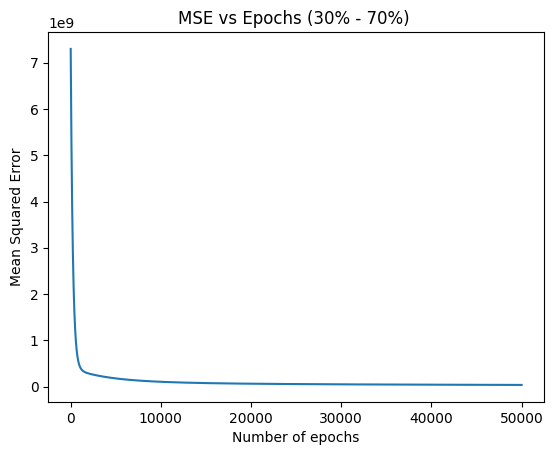

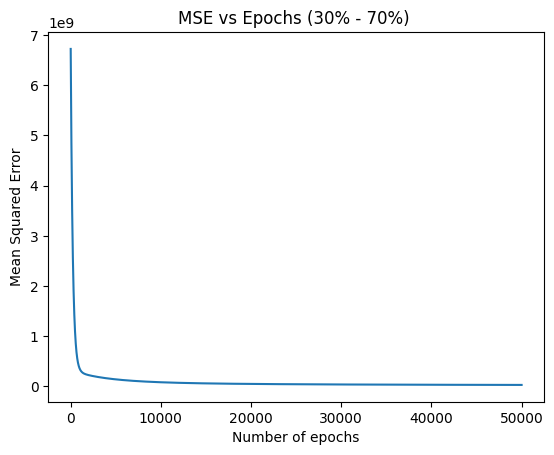

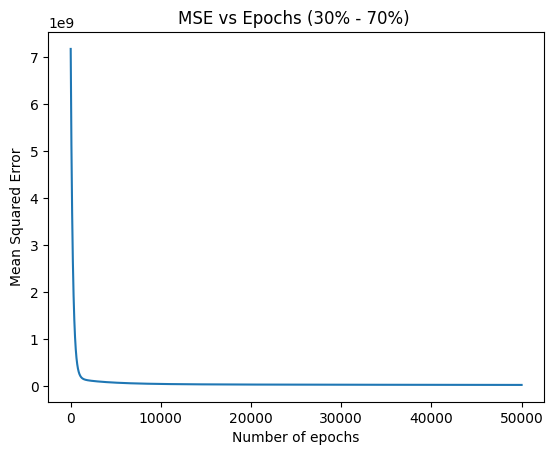

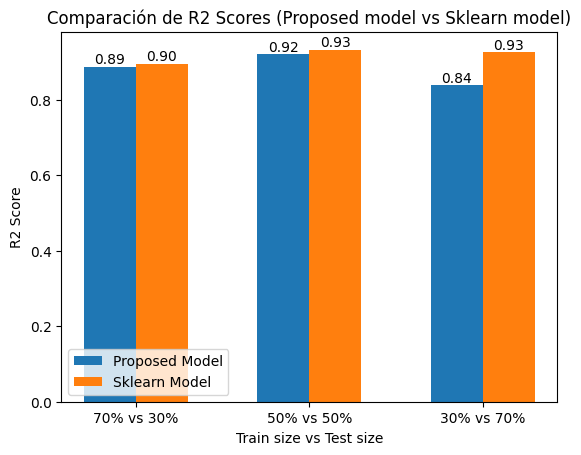

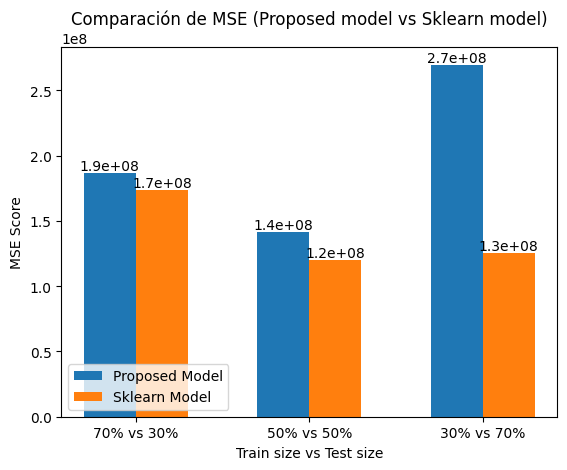

MSE for polynomial of degree 1.
Converged at epoch 7206


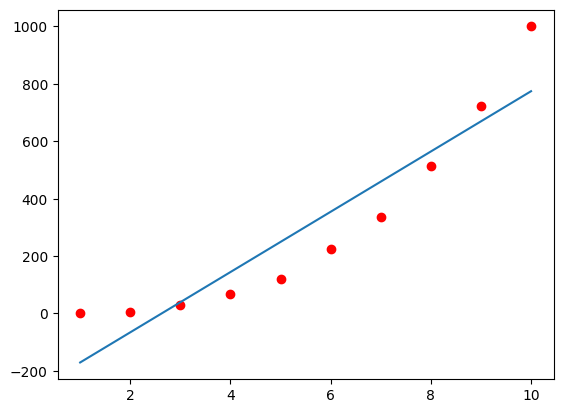

7269.331075802098


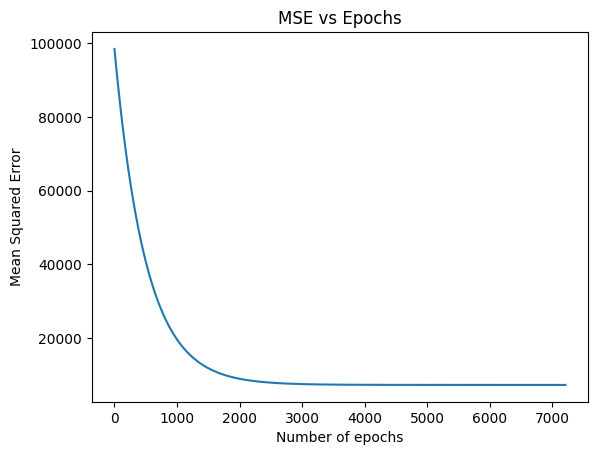

MSE for polynomial of degree 2.


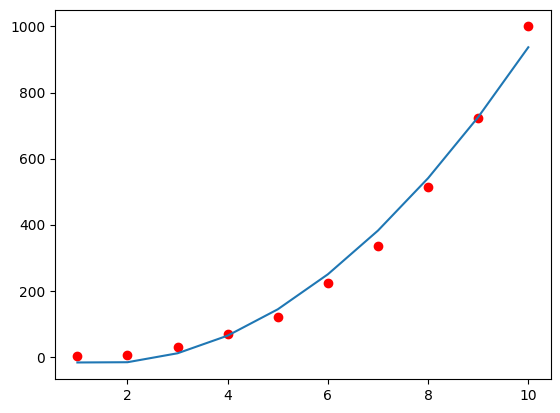

462.4710892264596


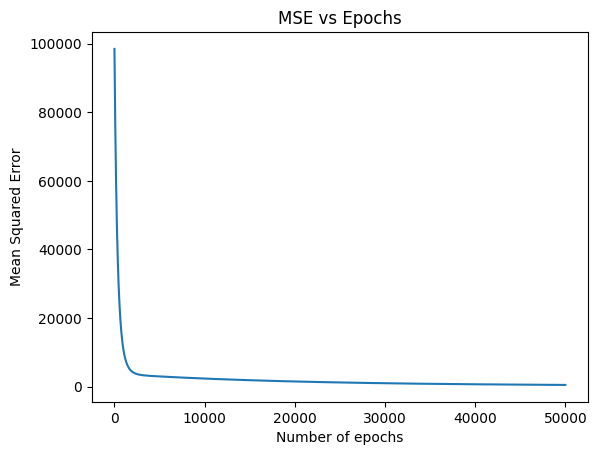

MSE for polynomial of degree 3.


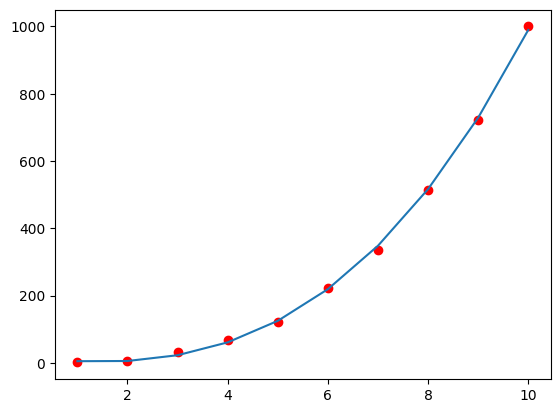

24.687343789306567


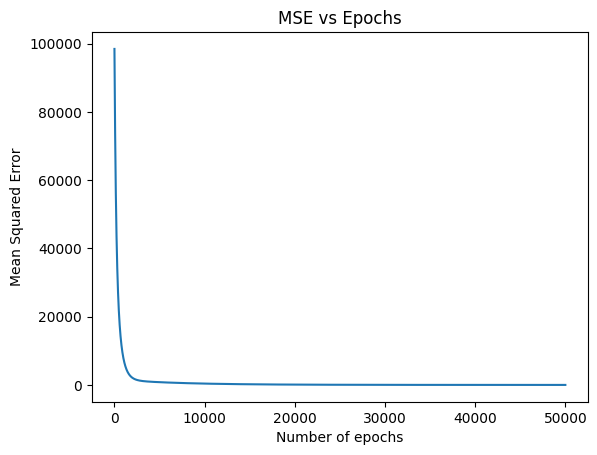

MSE for polynomial of degree 4.
Converged at epoch 28908


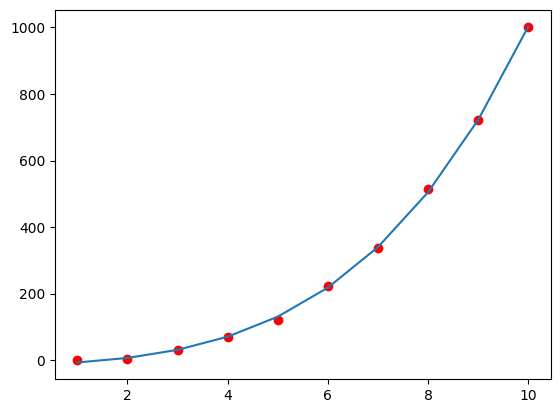

16.8671391321825


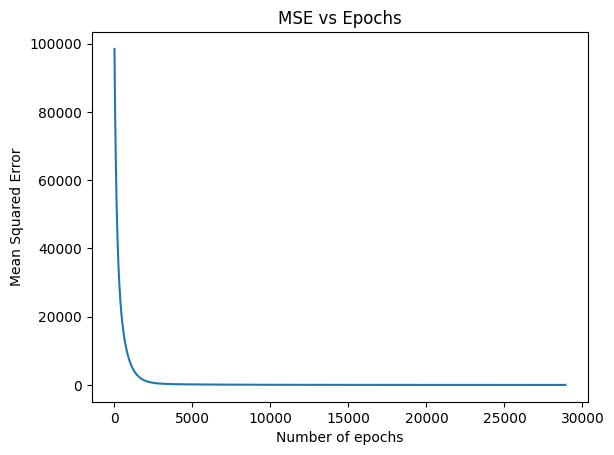

MSE for polynomial of degree 5.


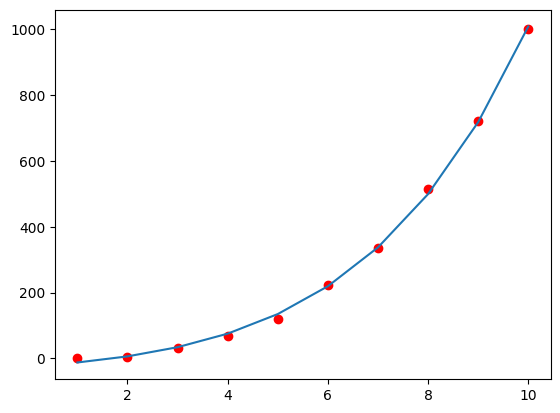

39.89771782367593


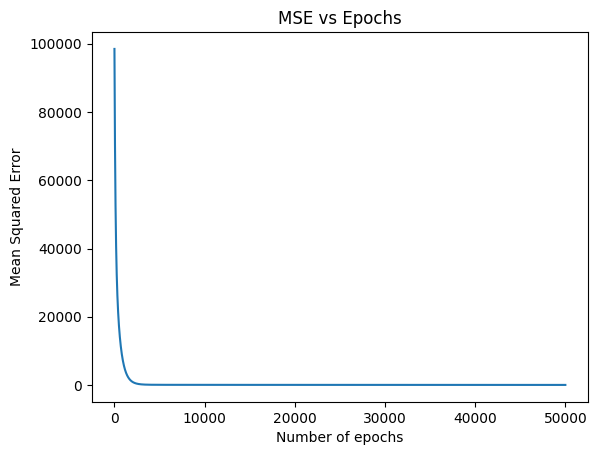

MSE for polynomial of degree 6.


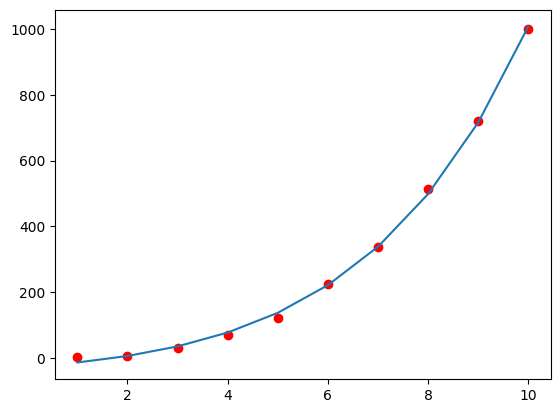

49.14781414669068


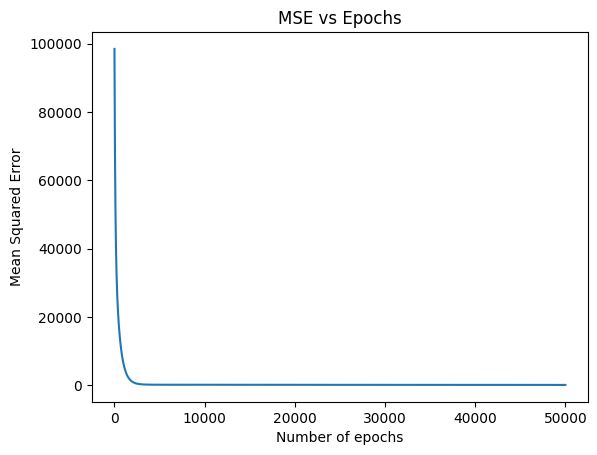

MSE for polynomial of degree 7.


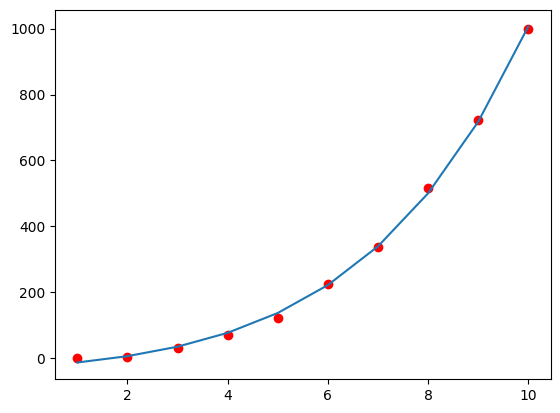

43.063760567800664


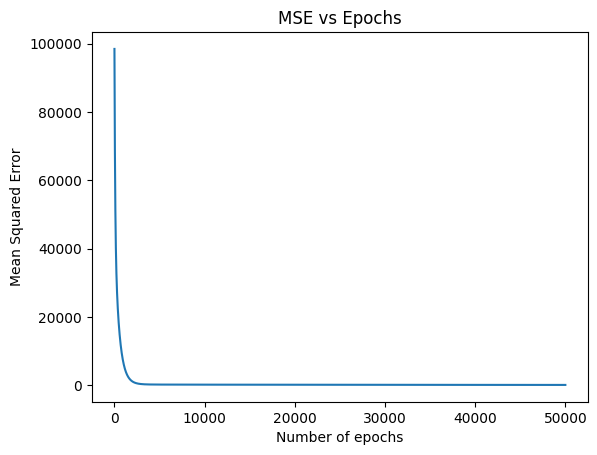

MSE for polynomial of degree 8.


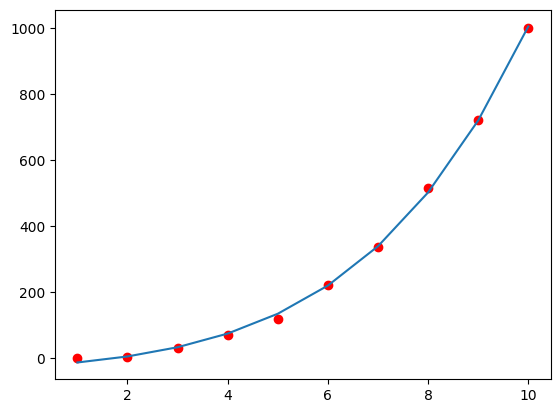

32.96506650129765


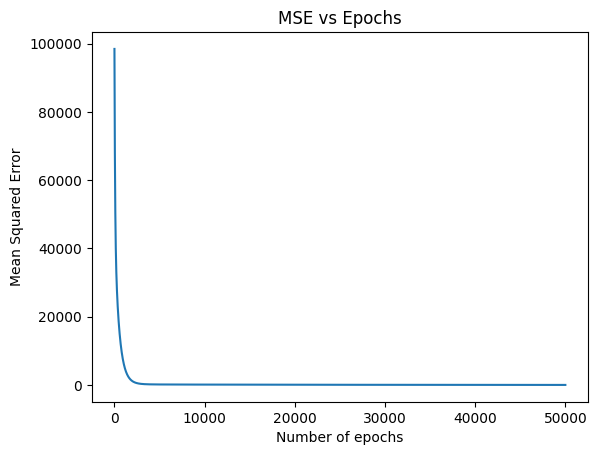

MSE for polynomial of degree 9.


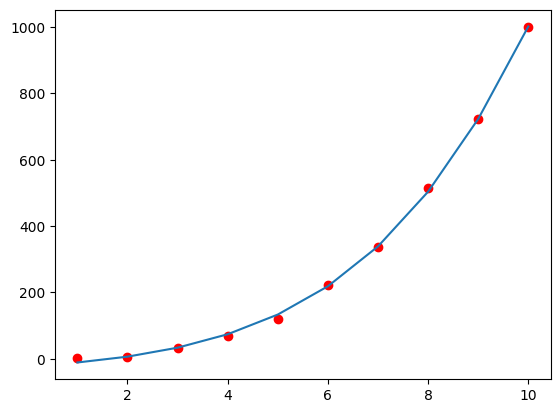

25.94149478737819


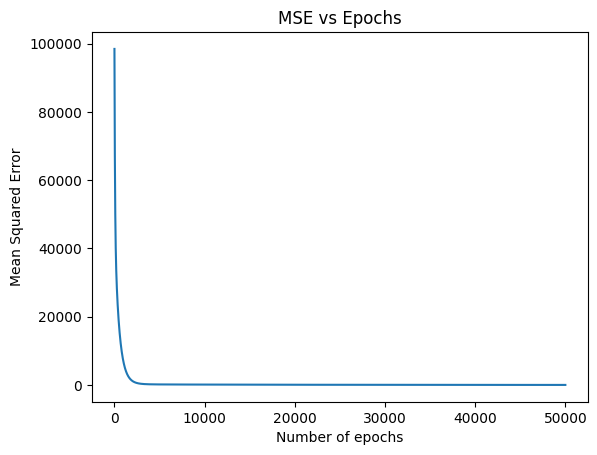

MSE for polynomial of degree 10.


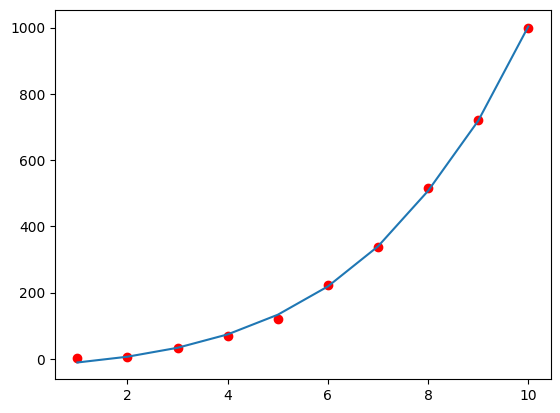

23.33012043355684


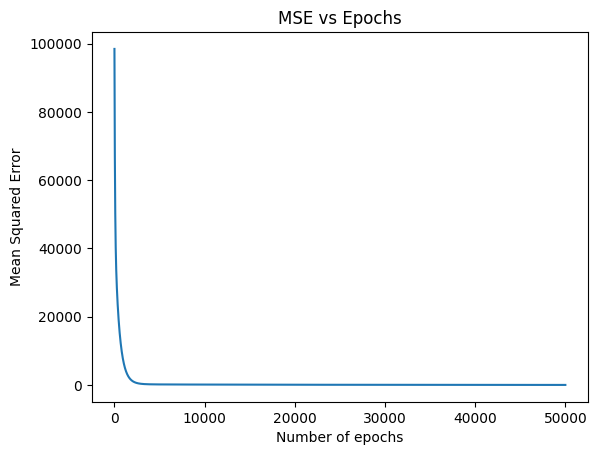

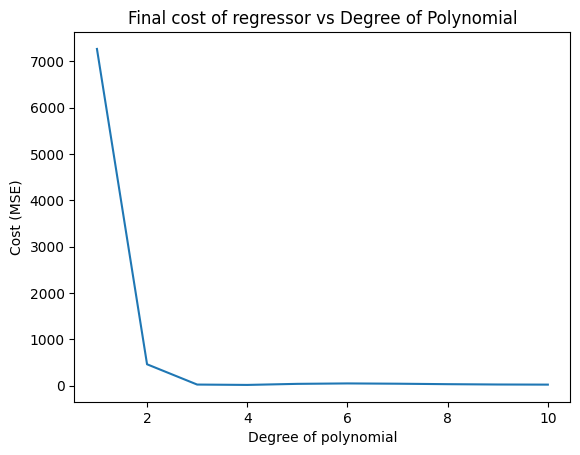

In [15]:
experiment_with_train_size(X,y)
test_polynomials()